# Solar Farm Data Analysis

In [12]:
import pandas as pd
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load dataset

In [13]:
df_benin = pd.read_csv('/home/bek/Desktop/KAiM/data/benin-malanville.csv')
df_sierraleone = pd.read_csv('/home/bek/Desktop/KAiM/data/sierraleone-bumbuna.csv')
df_togo = pd.read_csv('/home/bek/Desktop/KAiM/data/togo-dapaong_qc.csv')


In [14]:
print("Benin Data:")
print(df_benin.head())
print("\nSierra Leone Data:")
print(df_sierraleone.head())
print("\nTogo Data:")
print(df_togo.head())

Benin Data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

Sierra 

## Summary Statistics

 calculating the mean, median, standard deviation, and other relevant statistics for each numeric column to understand the distribution of the data.

In [15]:
#Summary statistics for numeric columns
print("Benin Data Summary Statistics:")
print(df_benin.describe())

print("\nSierra Leone Data Summary Statistics:")
print(df_sierraleone.describe())

print("\nTogo Data Summary Statistics:")
print(df_togo.describe())

Benin Data Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25

## Checking Data Quality

In [16]:
# Checking for missing values
print("Missing Values in Benin Data:")
print(df_benin.isnull().sum())

print("\nMissing Values in Sierra Leone Data:")
print(df_sierraleone.isnull().sum())

print("\nMissing Values in Togo Data:")
print(df_togo.isnull().sum())

Missing Values in Benin Data:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing Values in Sierra Leone Data:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: 

In [17]:
# Outlier detection using Z-score

def detect_outliers(df, column):
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    return df[(z_scores > 3)]

# Detecting outliers in specific columns
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in columns_to_check:
    print(f"\nOutliers in Benin Data ({col}):")
    print(detect_outliers(df_benin, col))
    
    print(f"\nOutliers in Sierra Leone Data ({col}):")
    print(detect_outliers(df_sierraleone, col))
    
    print(f"\nOutliers in Togo Data ({col}):")
    print(detect_outliers(df_togo, col))


Outliers in Benin Data (GHI):
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676     2021-08-09 11:17  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849     2021-08-09 14:10  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850     2021-08-09 14:11  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
517777  2022-08-03 13:38  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7   
520659  2022-08-05 13:40  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3   
520696  2022-08-05 14:17  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3   
522074  2022-08-06 13:15  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075  2022-08-06 13:16  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         WS  WSgust  WSstdev    

## Time Series Analysis

In [18]:
#Convert the Timestamp Column to Datetime Format

df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp'])
df_sierraleone['Timestamp'] = pd.to_datetime(df_sierraleone['Timestamp'])
df_togo['Timestamp'] = pd.to_datetime(df_togo['Timestamp'])


/home/bek/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


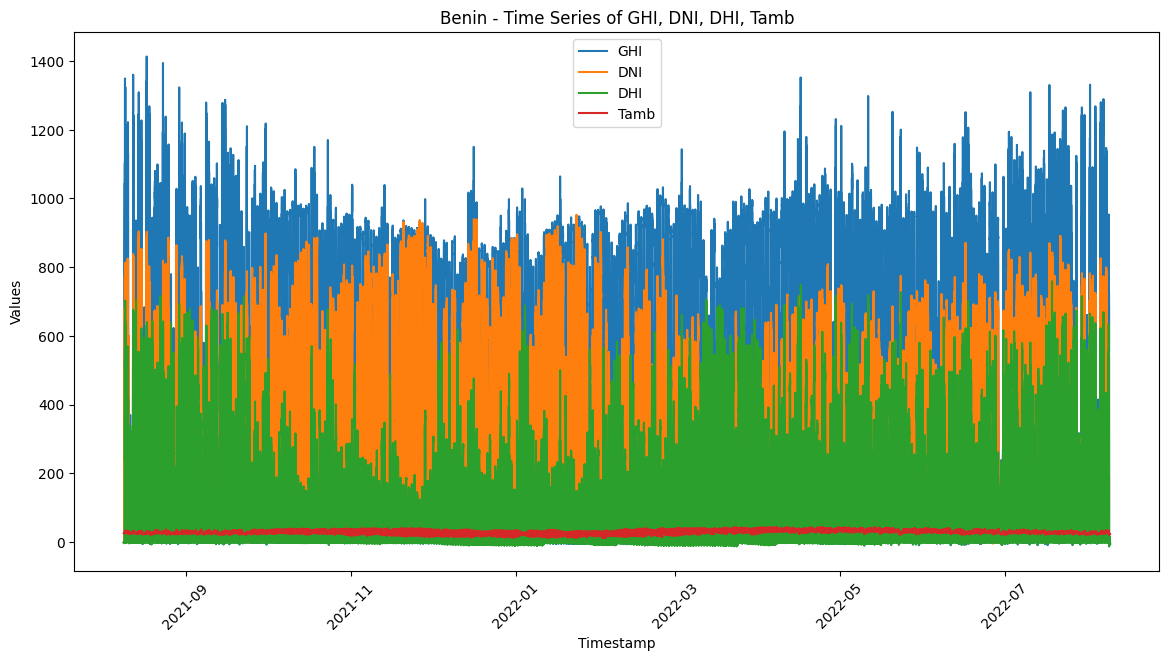

In [19]:

# Plotting GHI, DNI, DHI, and Tamb over time for Benin
plt.figure(figsize=(14, 7))
plt.plot(df_benin['Timestamp'], df_benin['GHI'], label='GHI')
plt.plot(df_benin['Timestamp'], df_benin['DNI'], label='DNI')
plt.plot(df_benin['Timestamp'], df_benin['DHI'], label='DHI')
plt.plot(df_benin['Timestamp'], df_benin['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Benin - Time Series of GHI, DNI, DHI, Tamb')
plt.legend()
plt.xticks(rotation=45)
plt.show()


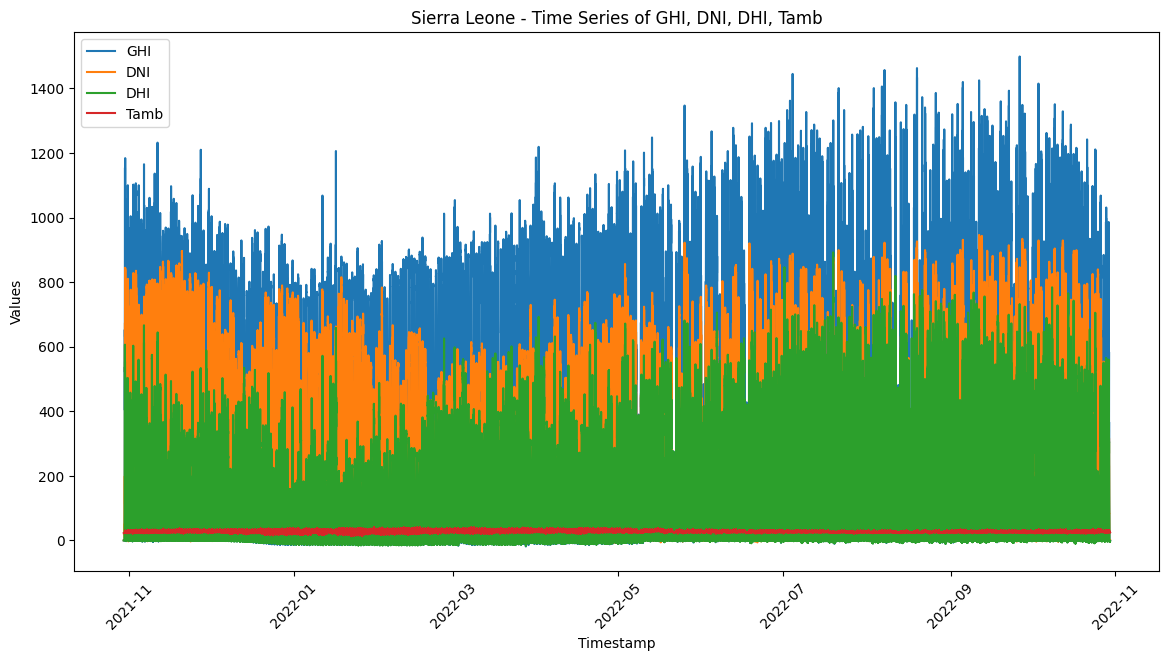

In [20]:
# Plotting GHI, DNI, DHI, and Tamb over time for Sierra Leone
plt.figure(figsize=(14, 7))
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['GHI'], label='GHI')
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['DNI'], label='DNI')
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['DHI'], label='DHI')
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Sierra Leone - Time Series of GHI, DNI, DHI, Tamb')
plt.legend()
plt.xticks(rotation=45)
plt.show()

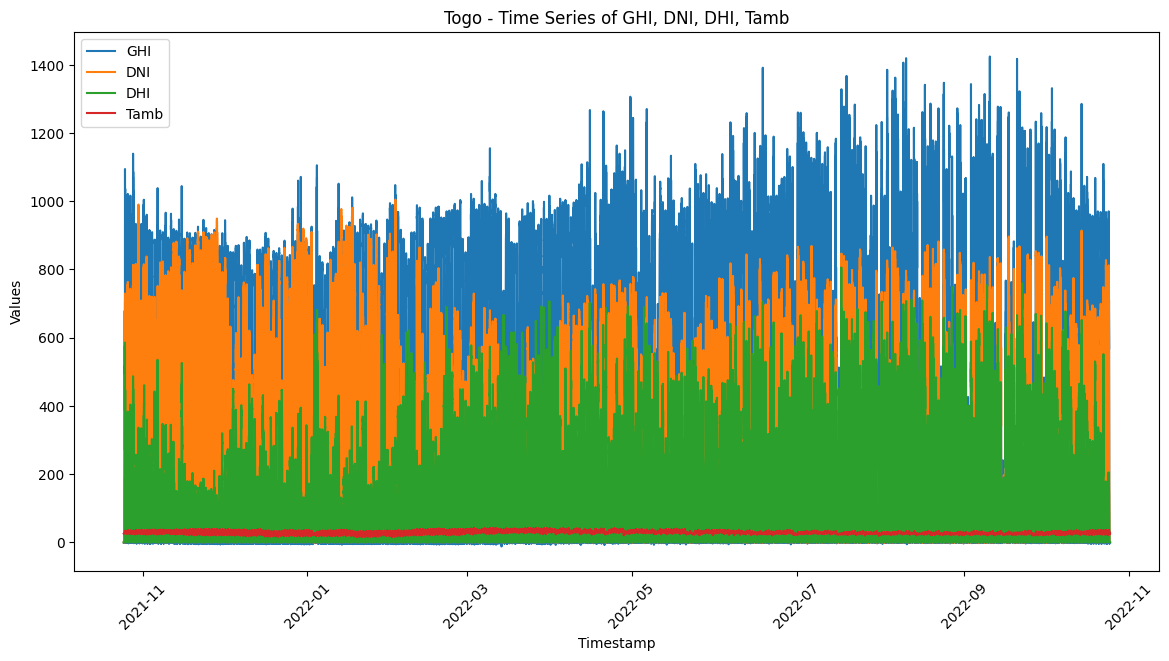

In [21]:
# Plotting GHI, DNI, DHI, and Tamb over time for Togo
plt.figure(figsize=(14, 7))
plt.plot(df_togo['Timestamp'], df_togo['GHI'], label='GHI')
plt.plot(df_togo['Timestamp'], df_togo['DNI'], label='DNI')
plt.plot(df_togo['Timestamp'], df_togo['DHI'], label='DHI')
plt.plot(df_togo['Timestamp'], df_togo['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Togo - Time Series of GHI, DNI, DHI, Tamb')
plt.legend()
plt.xticks(rotation=45)
plt.show()

##  Impact of Cleaning on Sensor Readings

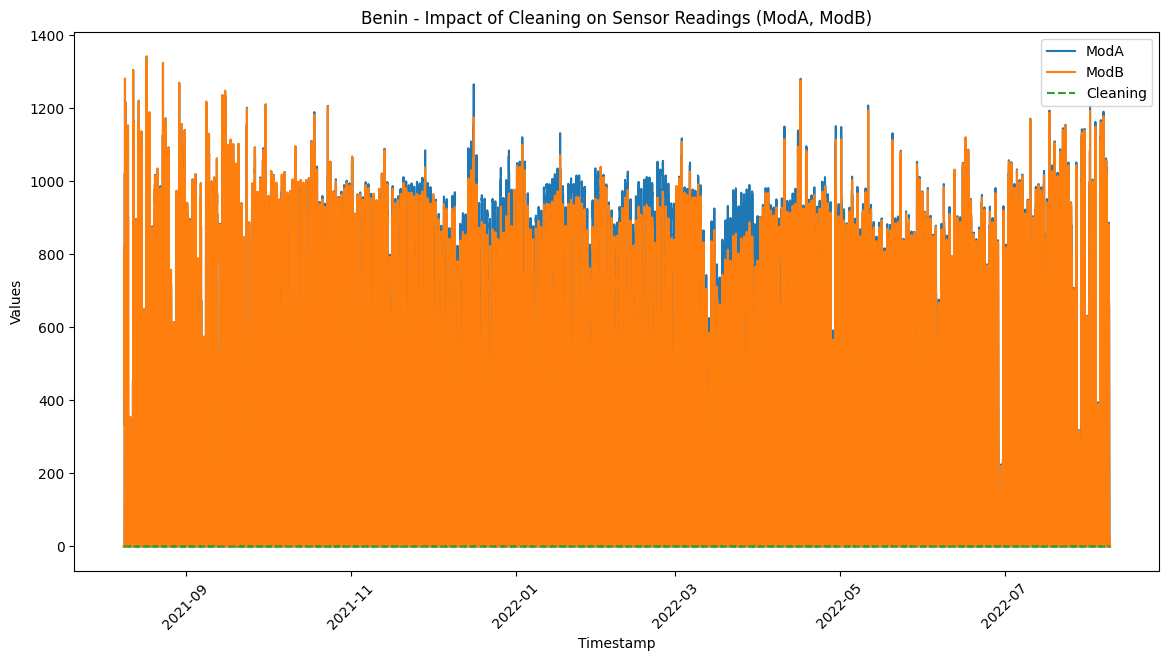

In [22]:
# Plotting ModA and ModB vs. Cleaning for Benin
plt.figure(figsize=(14, 7))
plt.plot(df_benin['Timestamp'], df_benin['ModA'], label='ModA')
plt.plot(df_benin['Timestamp'], df_benin['ModB'], label='ModB')
plt.plot(df_benin['Timestamp'], df_benin['Cleaning'], label='Cleaning', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Benin - Impact of Cleaning on Sensor Readings (ModA, ModB)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


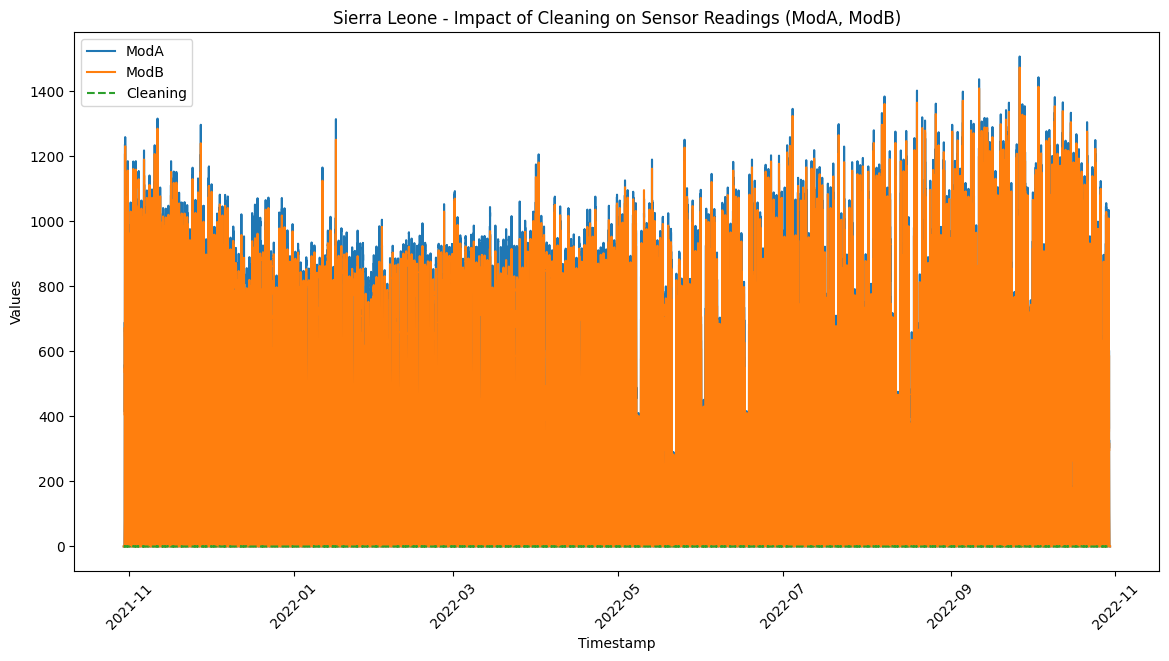

In [23]:
# Plotting ModA and ModB vs. Cleaning for Sierra Leone
plt.figure(figsize=(14, 7))
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['ModA'], label='ModA')
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['ModB'], label='ModB')
plt.plot(df_sierraleone['Timestamp'], df_sierraleone['Cleaning'], label='Cleaning', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Sierra Leone - Impact of Cleaning on Sensor Readings (ModA, ModB)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

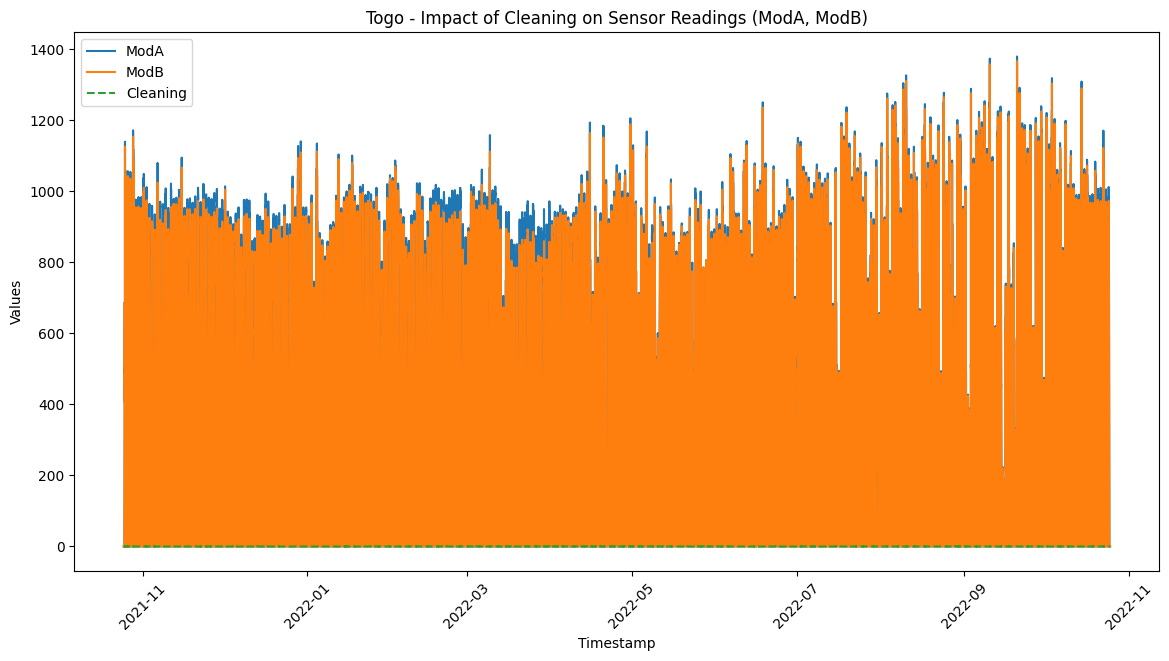

In [24]:
# Plotting ModA and ModB vs. Cleaning for Togo
plt.figure(figsize=(14, 7))
plt.plot(df_togo['Timestamp'], df_togo['ModA'], label='ModA')
plt.plot(df_togo['Timestamp'], df_togo['ModB'], label='ModB')
plt.plot(df_togo['Timestamp'], df_togo['Cleaning'], label='Cleaning', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Togo - Impact of Cleaning on Sensor Readings (ModA, ModB)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Correlation Analysis

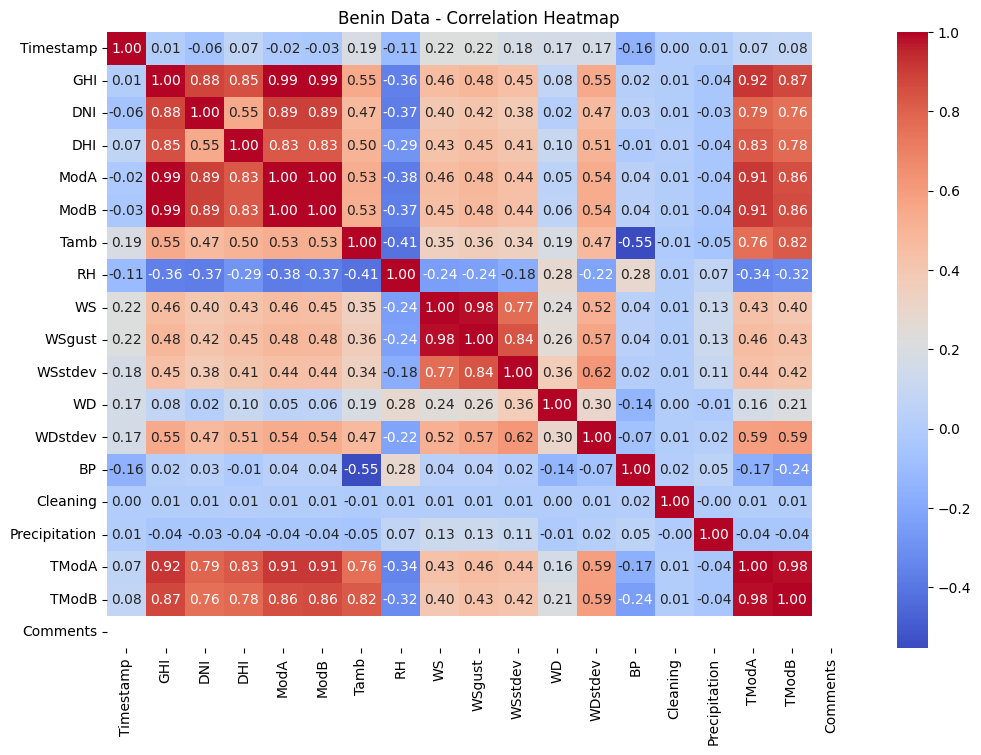

In [25]:

# Correlation heatmap for Benin data
plt.figure(figsize=(12, 8))
sns.heatmap(df_benin.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Benin Data - Correlation Heatmap')
plt.show()


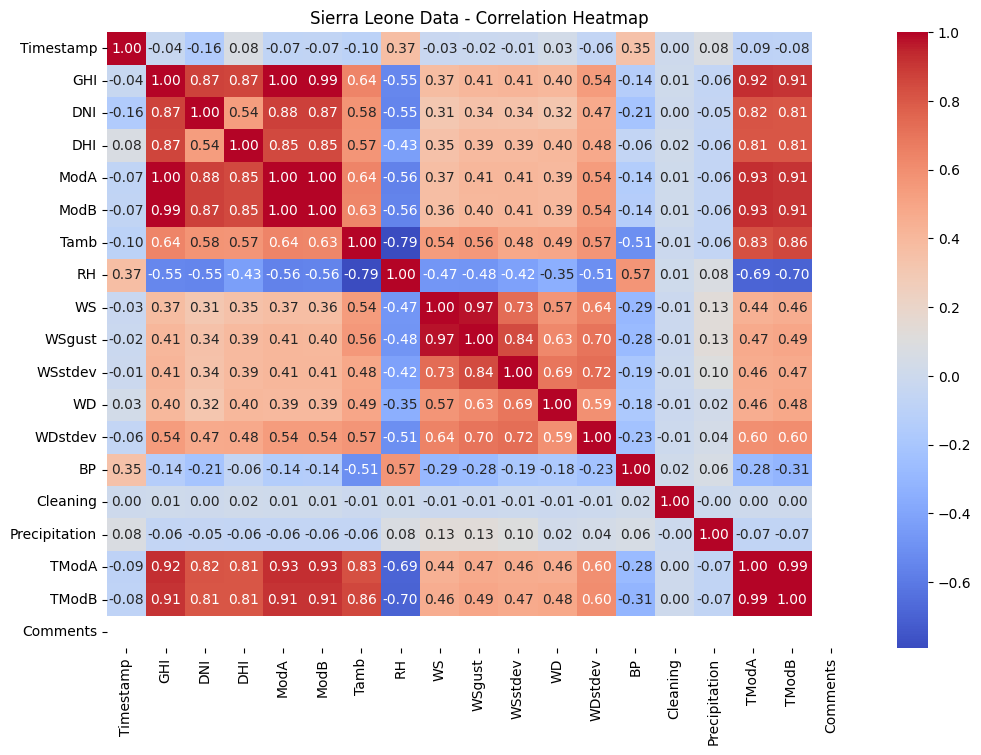

In [26]:
# Correlation heatmap for Sierra Leone data
plt.figure(figsize=(12, 8))
sns.heatmap(df_sierraleone.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sierra Leone Data - Correlation Heatmap')
plt.show()

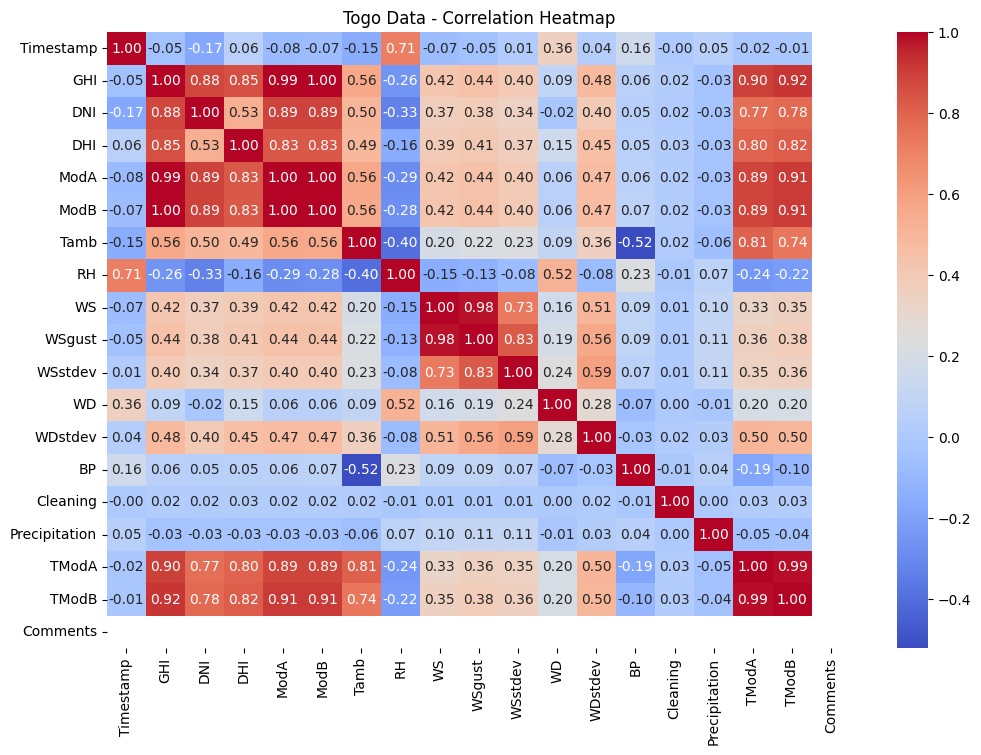

In [27]:
# Correlation heatmap for Togo data
plt.figure(figsize=(12, 8))
sns.heatmap(df_togo.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Togo Data - Correlation Heatmap')
plt.show()

## Wind Analysis

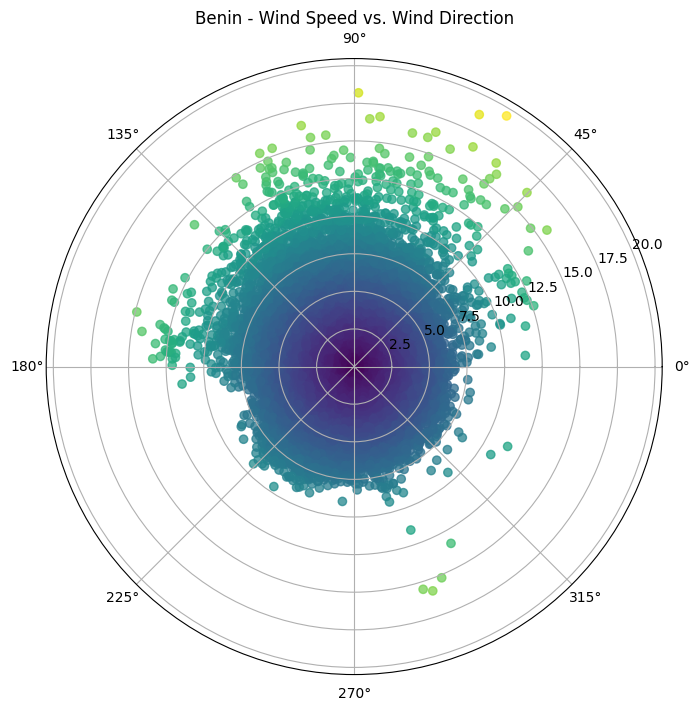

In [28]:
# Polar plot for wind analysis (Wind Speed vs. Direction)

# Convert WD (wind direction) from degrees to radians for polar plot
df_benin['WD_rad'] = np.deg2rad(df_benin['WD'])

# Polar plot for Benin
plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(df_benin['WD_rad'], df_benin['WS'], c=df_benin['WS'], cmap='viridis', alpha=0.75)
plt.title('Benin - Wind Speed vs. Wind Direction')
plt.show()

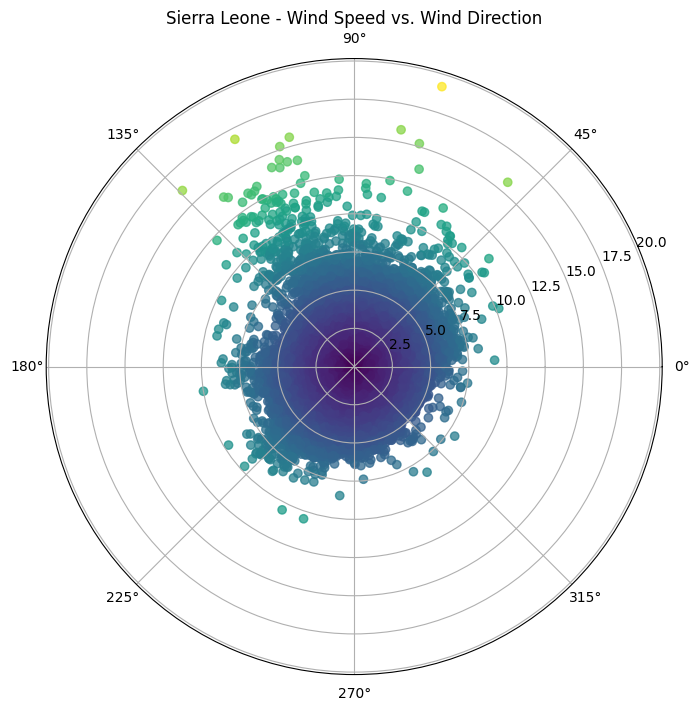

In [29]:
# Polar plot for Sierra Leone wind analysis (Wind Speed vs. Direction)
df_sierraleone['WD_rad'] = np.deg2rad(df_sierraleone['WD'])

plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(df_sierraleone['WD_rad'], df_sierraleone['WS'], c=df_sierraleone['WS'], cmap='viridis', alpha=0.75)
plt.title('Sierra Leone - Wind Speed vs. Wind Direction')
plt.show()

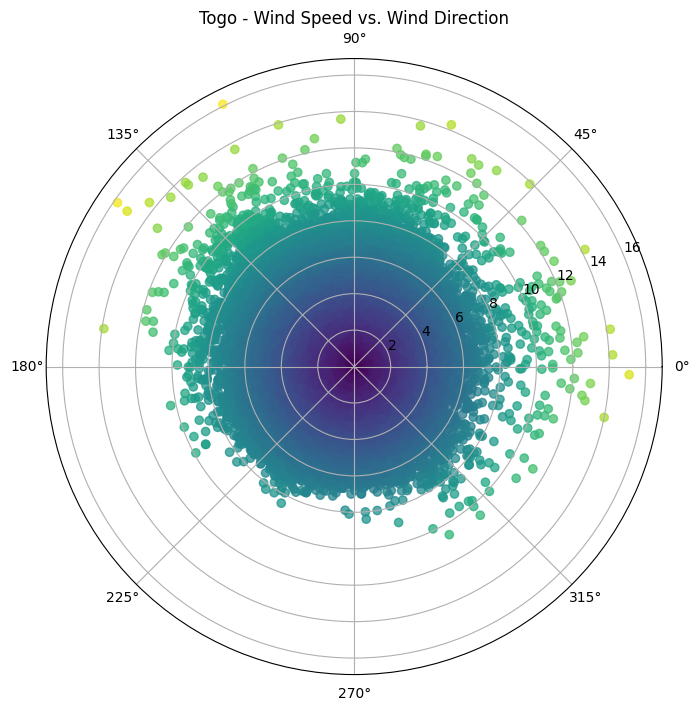

In [30]:
# Polar plot for Togo wind analysis (Wind Speed vs. Direction)
df_togo['WD_rad'] = np.deg2rad(df_togo['WD'])

plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(df_togo['WD_rad'], df_togo['WS'], c=df_togo['WS'], cmap='viridis', alpha=0.75)
plt.title('Togo - Wind Speed vs. Wind Direction')
plt.show()


## Temperature Analysis

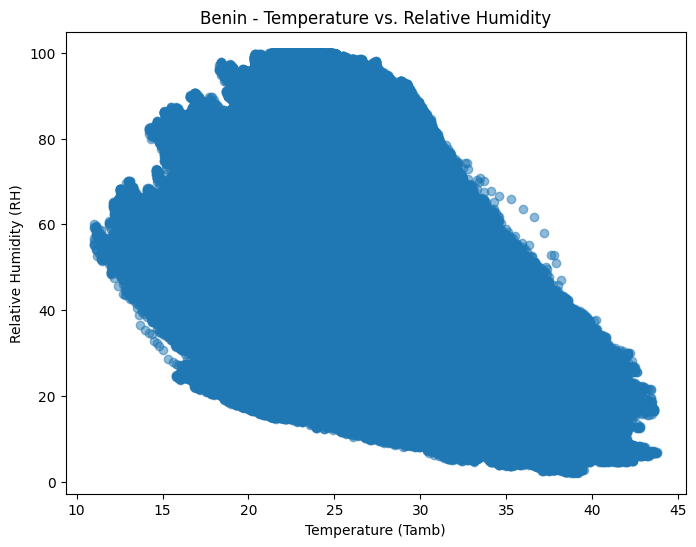

In [31]:
# Scatter plot for temperature vs. relative humidity
plt.figure(figsize=(8, 6))
plt.scatter(df_benin['Tamb'], df_benin['RH'], alpha=0.5)
plt.xlabel('Temperature (Tamb)')
plt.ylabel('Relative Humidity (RH)')
plt.title('Benin - Temperature vs. Relative Humidity')
plt.show()


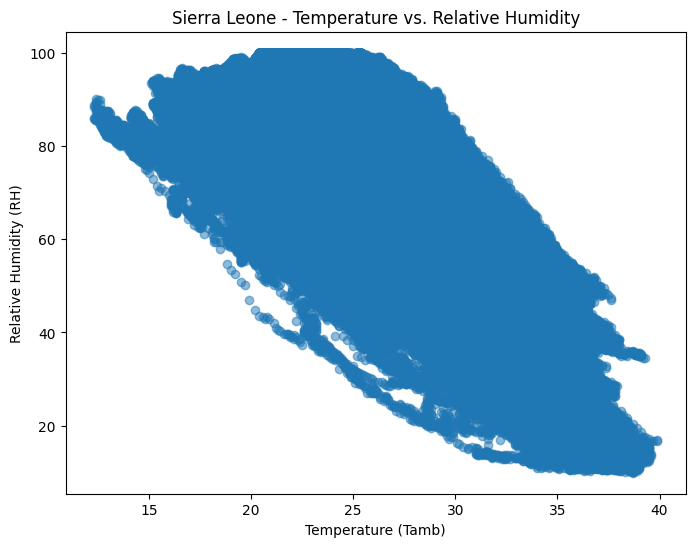

In [32]:
# Scatter plot for temperature vs. relative humidity in Sierra Leone
plt.figure(figsize=(8, 6))
plt.scatter(df_sierraleone['Tamb'], df_sierraleone['RH'], alpha=0.5)
plt.xlabel('Temperature (Tamb)')
plt.ylabel('Relative Humidity (RH)')
plt.title('Sierra Leone - Temperature vs. Relative Humidity')
plt.show()

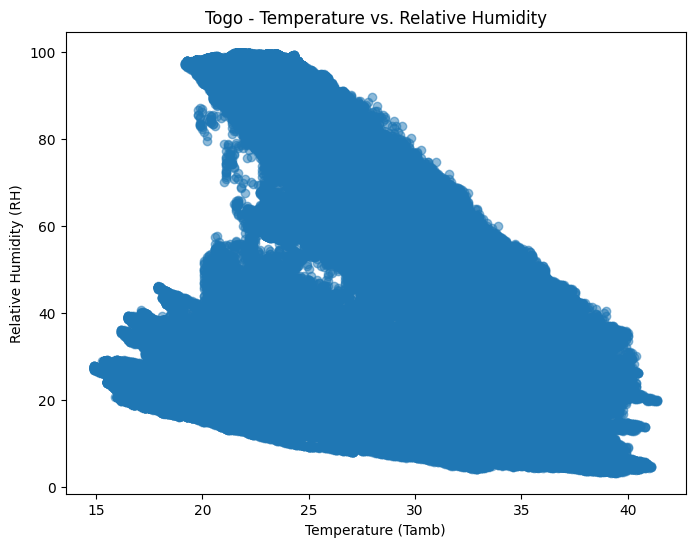

In [33]:
# Scatter plot for temperature vs. relative humidity in Togo
plt.figure(figsize=(8, 6))
plt.scatter(df_togo['Tamb'], df_togo['RH'], alpha=0.5)
plt.xlabel('Temperature (Tamb)')
plt.ylabel('Relative Humidity (RH)')
plt.title('Togo - Temperature vs. Relative Humidity')
plt.show()

## Histograms

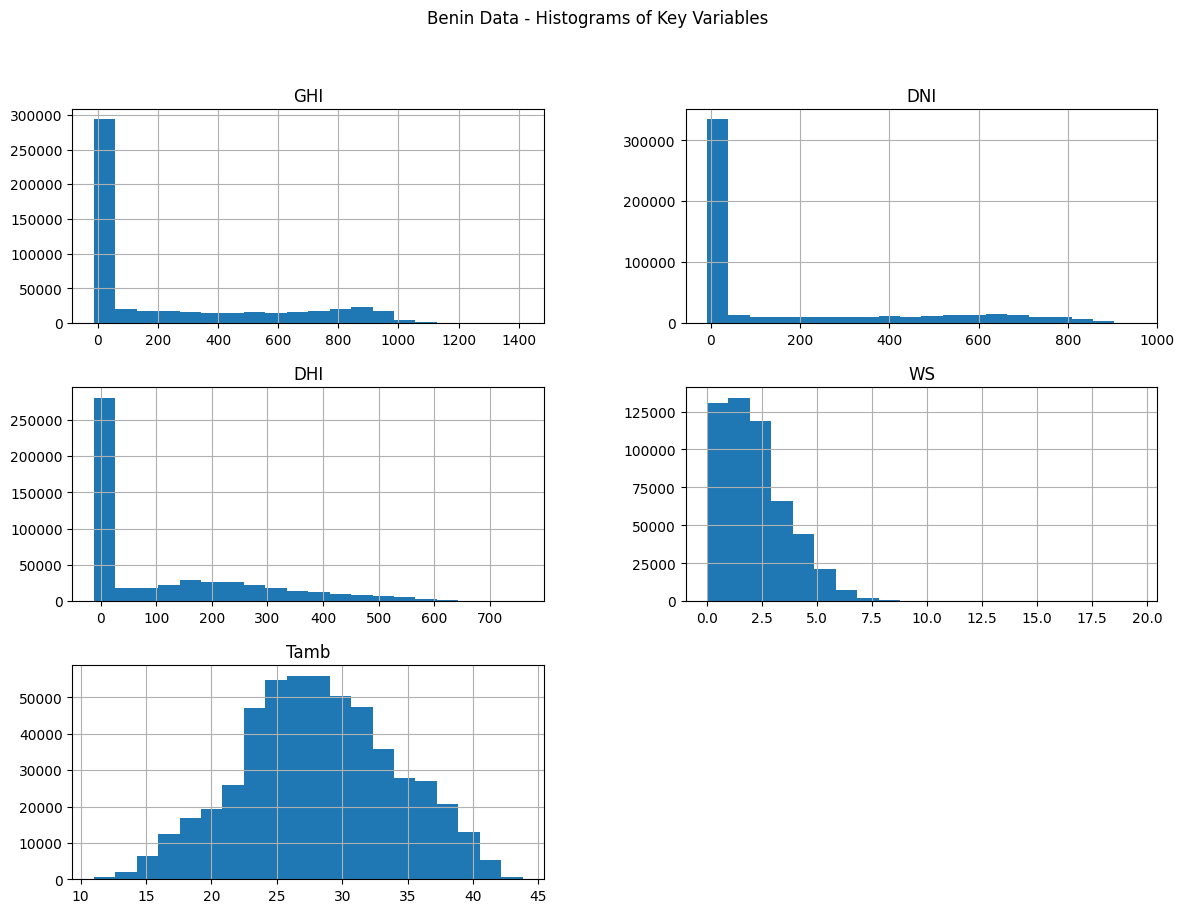

In [34]:
# Histograms for Benin data
df_benin[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(14, 10), bins=20)
plt.suptitle('Benin Data - Histograms of Key Variables')
plt.show()


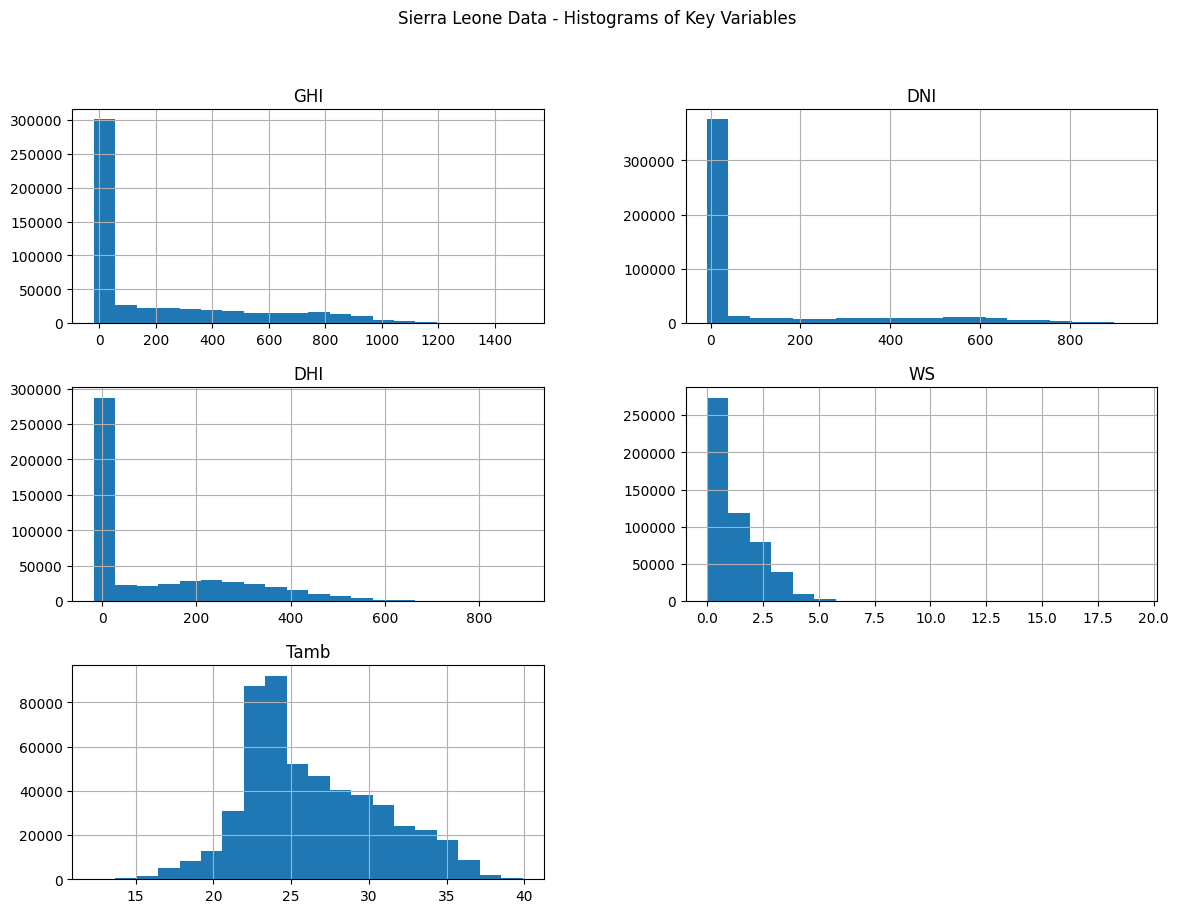

In [35]:
# Histograms for Sierra Leone data
df_sierraleone[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(14, 10), bins=20)
plt.suptitle('Sierra Leone Data - Histograms of Key Variables')
plt.show()

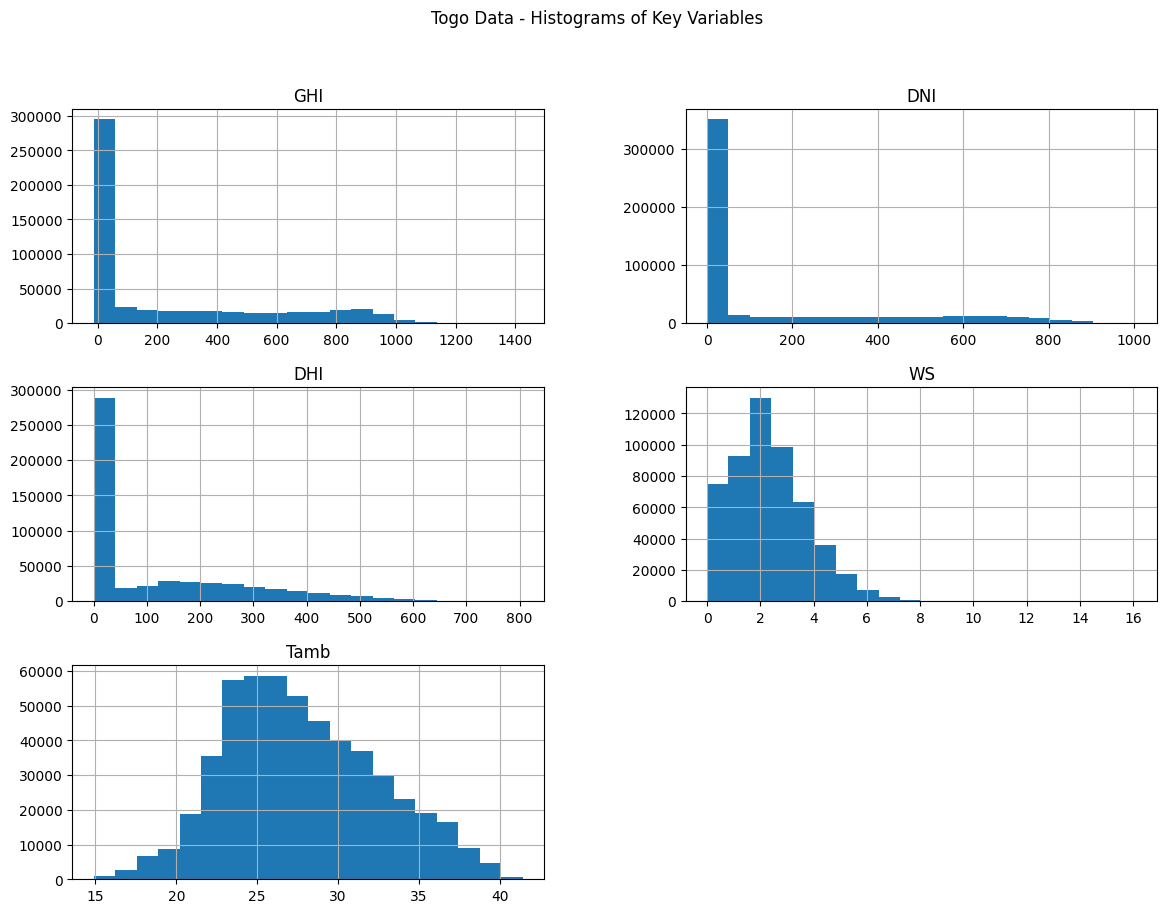

In [36]:
# Histograms for Togo data
df_togo[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(14, 10), bins=20)
plt.suptitle('Togo Data - Histograms of Key Variables')
plt.show()

## Z-Score Analysis

In [37]:
# Z-Score Analysis for Benin
z_scores_ghi = np.abs(stats.zscore(df_benin['GHI'].dropna()))
print("Z-scores for GHI (Benin):")
print(z_scores_ghi[z_scores_ghi > 3])  # Flagging outliers

Z-scores for GHI (Benin):
671       3.120942
674       3.347438
676       3.302139
849       3.057523
850       3.271939
            ...   
517777    3.102822
520659    3.139061
520696    3.030343
522074    3.084702
522075    3.166241
Name: GHI, Length: 89, dtype: float64


In [38]:
# Z-Score Analysis for Sierra Leone
z_scores_ghi_sierraleone = np.abs(stats.zscore(df_sierraleone['GHI'].dropna()))
print("Z-scores for GHI (Sierra Leone):")
print(z_scores_ghi_sierraleone[z_scores_ghi_sierraleone > 3])  # Flagging outliers


Z-scores for GHI (Sierra Leone):
663       3.072222
671       3.189477
780       3.045421
781       3.095673
782       3.179426
            ...   
517747    3.122474
517748    3.216278
517749    3.219628
517750    3.092323
517823    3.038721
Name: GHI, Length: 2477, dtype: float64


In [39]:
# Z-Score Analysis for Togo
z_scores_ghi_togo = np.abs(stats.zscore(df_togo['GHI'].dropna()))
print("Z-scores for GHI (Togo):")
print(z_scores_ghi_togo[z_scores_ghi_togo > 3])  # Flagging outliers

Z-scores for GHI (Togo):
248417    3.077043
248418    3.213464
248419    3.139052
248423    3.111148
248425    3.201062
            ...   
510410    3.070842
510412    3.269272
510413    3.011933
510414    3.213464
510416    3.049139
Name: GHI, Length: 305, dtype: float64


## Bubble Charts

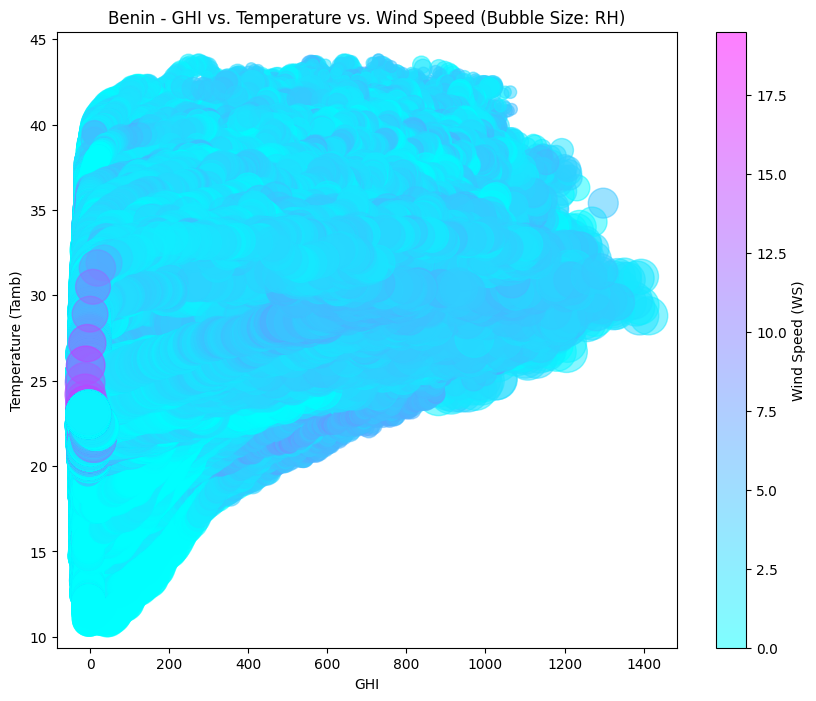

In [40]:
# Bubble chart: GHI vs. Tamb vs. WS, with bubble size representing RH
plt.figure(figsize=(10, 8))
plt.scatter(df_benin['GHI'], df_benin['Tamb'], s=df_benin['RH']*10, alpha=0.5, c=df_benin['WS'], cmap='cool')
plt.xlabel('GHI')
plt.ylabel('Temperature (Tamb)')
plt.title('Benin - GHI vs. Temperature vs. Wind Speed (Bubble Size: RH)')
plt.colorbar(label='Wind Speed (WS)')
plt.show()


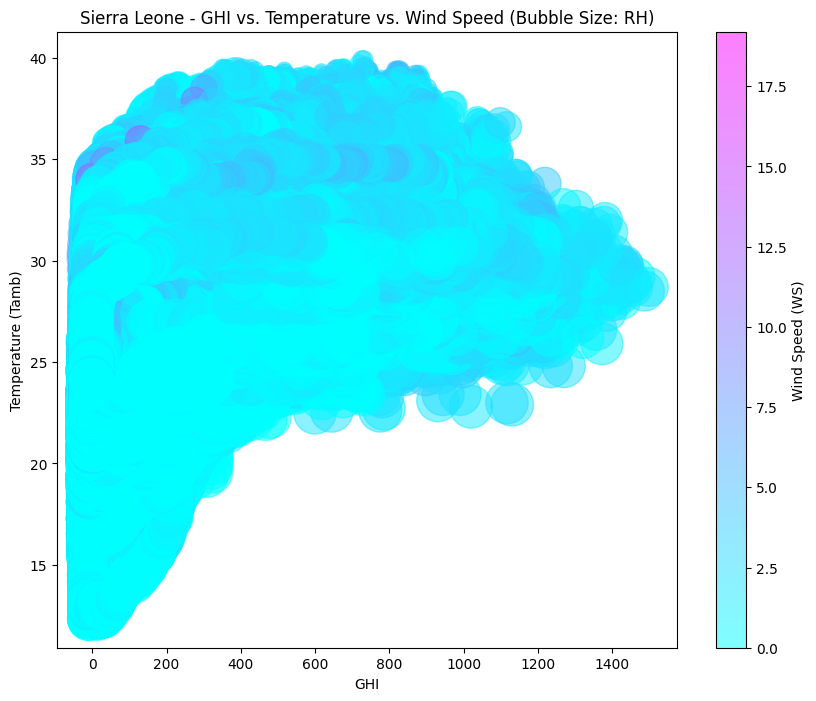

In [41]:
# Bubble chart for Sierra Leone: GHI vs. Tamb vs. WS, with bubble size representing RH
plt.figure(figsize=(10, 8))
plt.scatter(df_sierraleone['GHI'], df_sierraleone['Tamb'], s=df_sierraleone['RH']*10, alpha=0.5, c=df_sierraleone['WS'], cmap='cool')
plt.xlabel('GHI')
plt.ylabel('Temperature (Tamb)')
plt.title('Sierra Leone - GHI vs. Temperature vs. Wind Speed (Bubble Size: RH)')
plt.colorbar(label='Wind Speed (WS)')
plt.show()


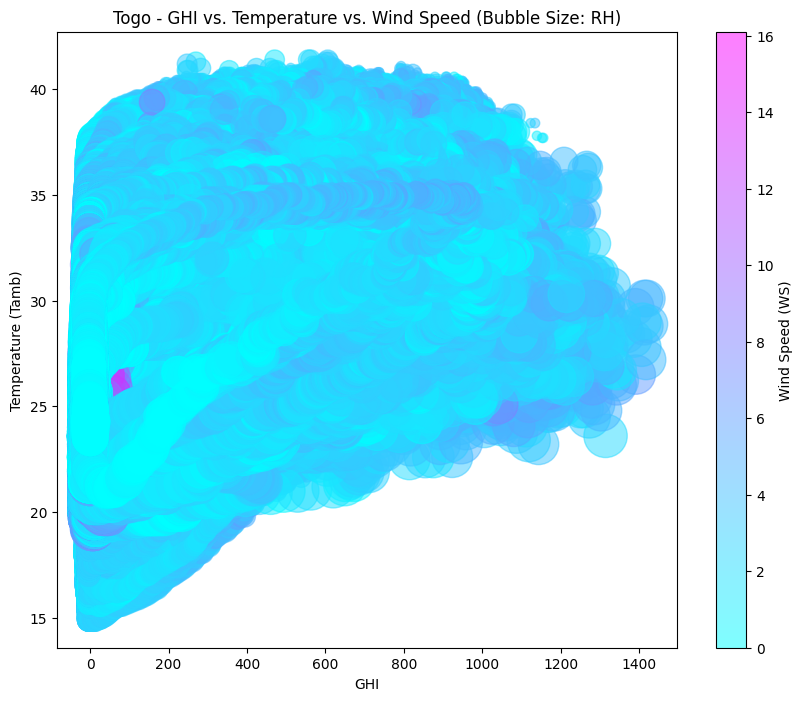

In [42]:
# Bubble chart for Togo: GHI vs. Tamb vs. WS, with bubble size representing RH
plt.figure(figsize=(10, 8))
plt.scatter(df_togo['GHI'], df_togo['Tamb'], s=df_togo['RH']*10, alpha=0.5, c=df_togo['WS'], cmap='cool')
plt.xlabel('GHI')
plt.ylabel('Temperature (Tamb)')
plt.title('Togo - GHI vs. Temperature vs. Wind Speed (Bubble Size: RH)')
plt.colorbar(label='Wind Speed (WS)')
plt.show()

## Data Cleaning

In [43]:
# handling missing values in 'Comments' by dropping the column
df_benin.drop(columns=['Comments'], inplace=True)
df_sierraleone.drop(columns=['Comments'], inplace=True)
df_togo.drop(columns=['Comments'], inplace=True)

# fill missing values in other columns
df_benin.fillna(method='ffill', inplace=True)  # Forward filling
df_sierraleone.fillna(method='ffill', inplace=True) 
df_togo.fillna(method='ffill', inplace=True)
